##Team Members
Kaleb Wainright <br>
Zachary Hamilton<br>
Carter Gray<br>
Chase Brock<br>
Sandra Wiktor<br>

##Original Proposal
Our team set out to create a computer vision algorithm that could identify constellations present in images of the night sky. Our algorithm takes in images sourced from the Milkyway Panorama from NOAA.gov and produces a decision indicating the constellation(s) present. The images used depict the night sky as a person would see it. Images that are simply dots with lines were not eligible for this project. The algorithm would be useful for students learning to identify constellations or could be used by a mobile application to allow users to enjoy guided stargazing. The main purpose of our algorithm is to identify constellations that are present in an image whether it is sourced from a user’s mobile device or a satellite.

We collected images from the video of the Milky Way Panorama by taking regular screenshots using a python script. Our initial plan was to use an artificial neural network, probably from a framework like scikit learn or tensorflow, to process the images. This neural network would take in images and produce a prediction containing the names of the constellations present in the image. Our neural network would be trained using labeled images of constellations ranging from images with a singular constellation to images with multiple constellations. 

##Constellation Classification
This model classifies star patterns present in a frame into constellations. This tool is useful for hobbyists and students interested in astronomy.

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from matplotlib.widgets import Slider
import mpl_interactions.ipyplot as iplt
from IPython.display import Image

#Star Data Dataset
This dataset was manually created and labeled by Zach and Carter. A panorama of the Milky Way developed by [Science on a Sphere](https://sos.noaa.gov/datasets/milky-way-panorama-constellation-outlines/) was utilized to collect the data. This map was created by "combining 16 wide-angle photographs taken with a standard 35-mm camera and color negative film." Screenshots the interactive spheres developed by Science on a Sphere were taken at the same rate where each screenshot was in roughly the same astro-location of the corresponding screenshot. Each outlined screenshot was examined and labeled on the basis of which constellations were present.


In [3]:
T=pd.read_csv('C:\\Users\\Zachary\\Downloads\\completeStarData.csv')
X=[]

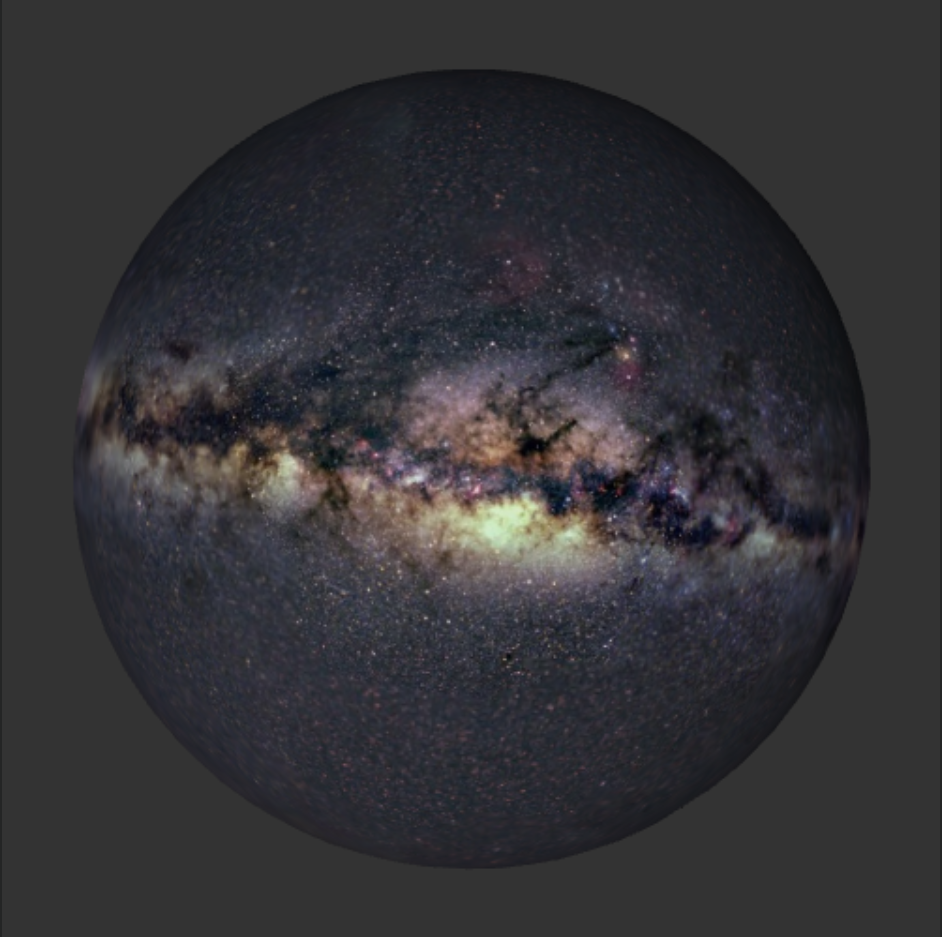

In [4]:
path_to_images='C:/Users/Zachary/Downloads/Data'
for i in range(684):
    im_full = cv2.imread(path_to_images + '/Galaxy' + str(int(i+1)) + '.png')
    im_full=np.mean(im_full/255,axis=2)
    X.append(im_full.flatten())
    
display(Image(path_to_images + '/Galaxy' + str(1) + '.png'))

#Estimators
We ran a Random Forest Classifier algorithm on the code and determined the best estimators to be ~150.


In [ ]:
#do not run it takes a long time
min_estimators = 5
max_estimators = 250
rng = range(min_estimators, max_estimators, 5)

errors = {'test': [], 'oob': []}
for n_est in rng:
    rf = RandomForestClassifier(n_estimators=n_est,warm_start=False)
    rf.fit(X,T)
    Y=rf.predict(X)
    test_score = rf.score(X,T)
    errors['test'].append(test_score)

The plot below demonstrates the performance of the estimators. 

Text(0.5, 0, '# estimators')

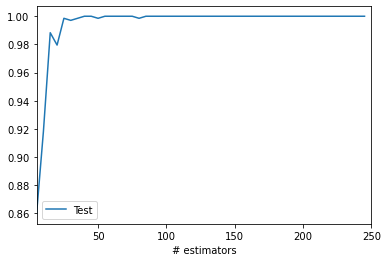

In [ ]:
plt.plot(rng,errors['test'],label='Test')

plt.xlim(min_estimators, max_estimators)
plt.legend()
plt.xlabel("# estimators") 

#Random Forest Classifier

The Random Forest Classifier was run and the results of our model's performance are demonstrated below. 

(Takes about 5-10 minutes to run)

In [5]:

rf = RandomForestClassifier(n_estimators=150,oob_score=True,warm_start=True)

rf.fit(X,T)
Y=rf.predict(X)
test_score = rf.score(X,T)
print("Test Accuracy: {} OOB Score:{}".format(test_score,rf.oob_score_))

Test Accuracy: 1.0 OOB Score:0.9535412605588042


In [6]:
print('Classification Report:\n',classification_report(T,Y))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00       149
           2       1.00      1.00      1.00        67
           3       1.00      1.00      1.00        85
           4       1.00      1.00      1.00        75
           5       1.00      1.00      1.00       125
           6       1.00      1.00      1.00        89
           7       1.00      1.00      1.00        60
           8       1.00      1.00      1.00        81
           9       1.00      1.00      1.00        31
          10       1.00      1.00      1.00        54
          11       1.00      1.00      1.00       144
          12       1.00      1.00      1.00        85
          13       1.00      1.00      1.00        43
          14       0.00      0.00      0.00         0
          15       1.00      1.00      1.00       141
          16       1.00      1.00      1.00        92
   

C:\Users\Zachary\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zachary\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Random Forest Classifier Plots

The results of the Random Forest Classifier plot are demonstrated below.

The graph below is a visualization of one of the decision trees reaching a depth of 5.


<IPython.core.display.Javascript object>


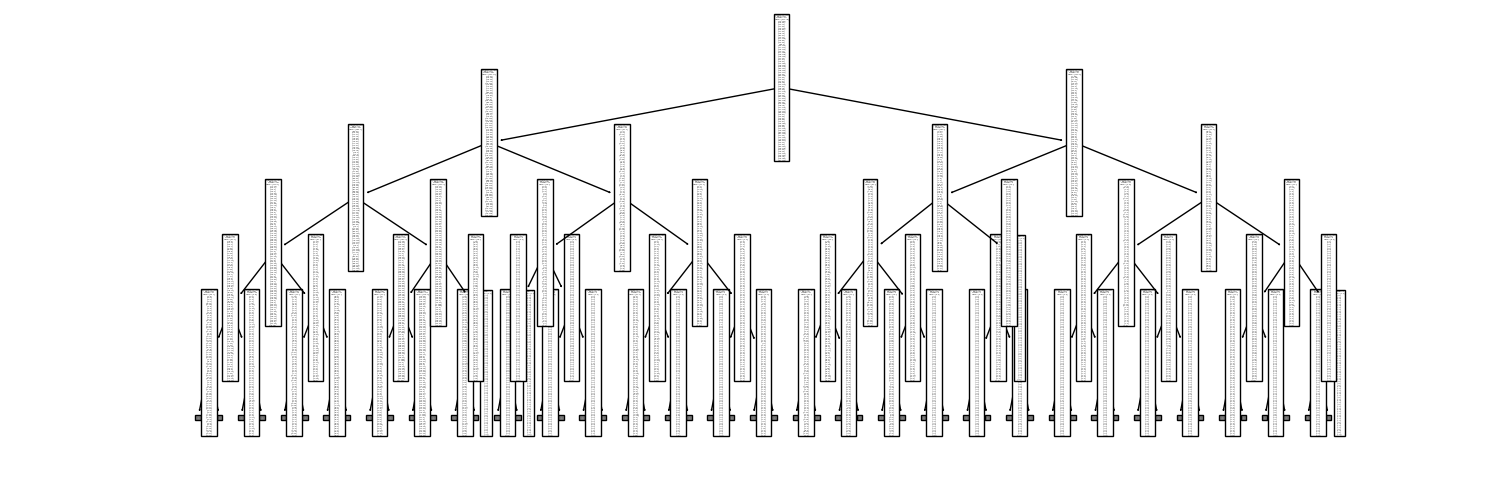

In [7]:
from sklearn import tree
fig1=plt.figure(figsize=(15,5))
tree.plot_tree(rf.estimators_[0],max_depth=5)
plt.show()

The graph below compares targets to their labels. The yellow color indicates a true positive result, the teal coloring represents a false positive/negative, and the purple represents a true negative result. As this model uses multiclass labeling, a confusion matrix would be difficult to implement. Therefore, this graph acts as a replacement. 

<IPython.core.display.Javascript object>


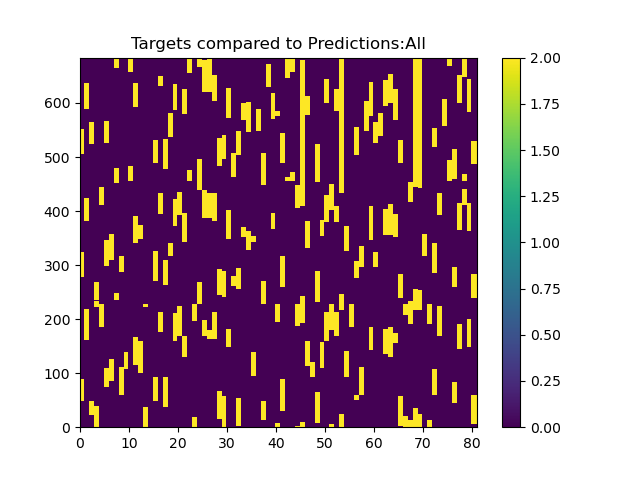

Text(0.5, 1.0, 'Targets compared to Predictions:All')

In [8]:
fig, ax = plt.subplots()

ax.pcolormesh(Y+T)
cf=ax.pcolorfast(Y+T)
plt.colorbar(cf,ax=ax)
plt.title('Targets compared to Predictions:All')

The line graph below provides another angle from which the view the data shown in the graph above. This provides an overview of the targets compare to the prediction from each image. A slider can be used to select the image to view.


<IPython.core.display.Javascript object>


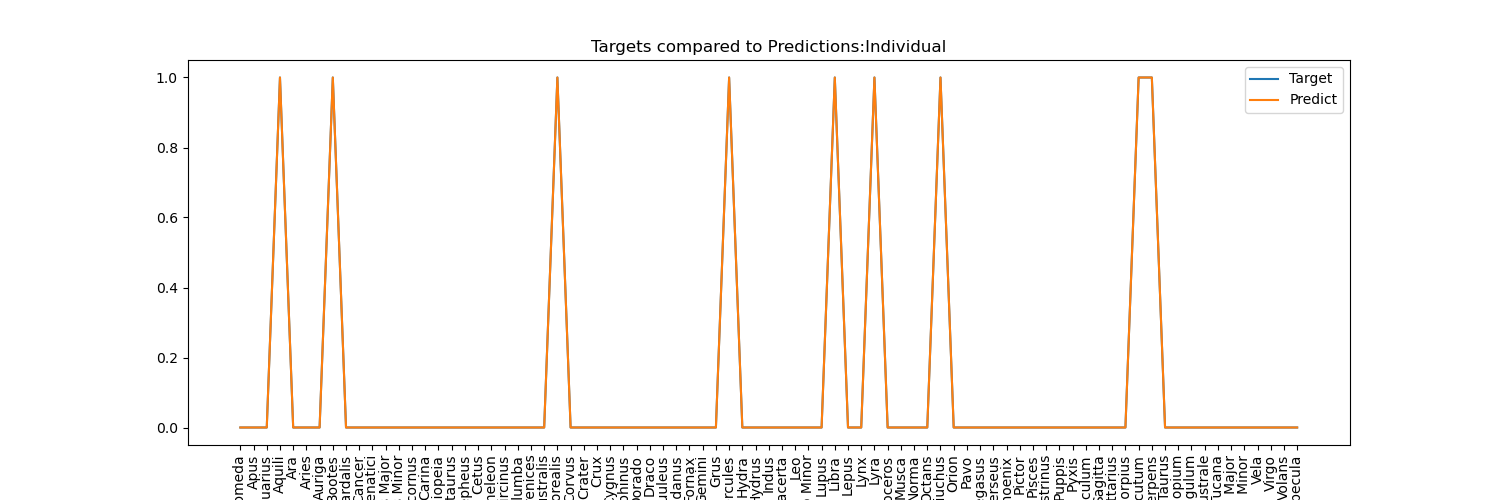

interactive(children=(IntSlider(value=342, description='val', max=684, min=1), Output()), _dom_classes=('widge…

<function __main__.update>

In [9]:

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 1, 1)
plt.xticks(rotation=90)
line, = ax.plot(T.iloc[0],label='Target')
line2, = ax.plot(Y[0],label='Predict')
plt.title('Targets compared to Predictions:Individual')
plt.legend()
def update(val=(1,684)):
    line.set_ydata(T.iloc[val-1])
    line2.set_ydata(Y[val-1])
    fig.canvas.draw_idle()


interact(update)